<a href="https://colab.research.google.com/github/sakshi1018/Data-Analysis-of-ODI-Cricket-Matches-2018/blob/master/ODI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install gmplot
!pip install gmaps

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [78]:
data=pd.read_csv("/content/ODI.csv")
data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,6-Jan-18,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,9-Jan-18,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,11-Jan-18,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,13-Jan-18,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,13-Jan-18,ODI # 3950


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      128 non-null    object
 1   Team 2      128 non-null    object
 2   Winner      128 non-null    object
 3   Margin      123 non-null    object
 4   Ground      128 non-null    object
 5   Match Date  128 non-null    object
 6   Scorecard   128 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


##split columns by run and by wicket

In [80]:
#split data['Margin'] by wicket and by run
data[['num','run']]=data['Margin'].str.split(" ",expand=True)
a=data[data['run']=='runs']
b=data[data['run']=='wickets']
data['winner_by_run']=a['num']
data['winner_by_wickets']=b['num']
data1=data.drop(['Margin','num','run'],axis=1)

In [81]:
#fill missing values with 0
data1['winner_by_run'].fillna("0",inplace = True)
data1['winner_by_wickets'].fillna("0",inplace = True)
#convert data type from object to int
data1['winner_by_run']=data1['winner_by_run'].astype('int64') 
data1['winner_by_wickets']=data1['winner_by_wickets'].astype('int64') 
data1.head()

,Team 1,Team 2,Winner,Ground,Match Date,Scorecard,winner_by_run,winner_by_wickets
0,New Zealand,Pakistan,New Zealand,Wellington,6-Jan-18,ODI # 3946,61,0
1,New Zealand,Pakistan,New Zealand,Nelson,9-Jan-18,ODI # 3947,0,8
2,U.A.E.,Ireland,Ireland,ICCA Dubai,11-Jan-18,ODI # 3948,0,4
3,New Zealand,Pakistan,New Zealand,Dunedin,13-Jan-18,ODI # 3949,183,0
4,U.A.E.,Ireland,Ireland,ICCA Dubai,13-Jan-18,ODI # 3950,67,0


##which country played the most ODIs

In [82]:
countries=pd.concat([data1['Team 1'],data1['Team 2']])
dict1=countries.value_counts() 
dict1.index

Index(['Zimbabwe', 'England', 'India', 'Afghanistan', 'Bangladesh', 'Pakistan',
       'West Indies', 'Sri Lanka', 'South Africa', 'Australia', 'New Zealand',
       'Ireland', 'Scotland', 'U.A.E.', 'Hong Kong', 'P.N.G.', 'Nepal',
       'Netherlands'],
      dtype='object')

In [83]:
dict1.idxmax()

'Zimbabwe'

Text(0.5, 1.0, 'no of times a country played in ODI in 2018')

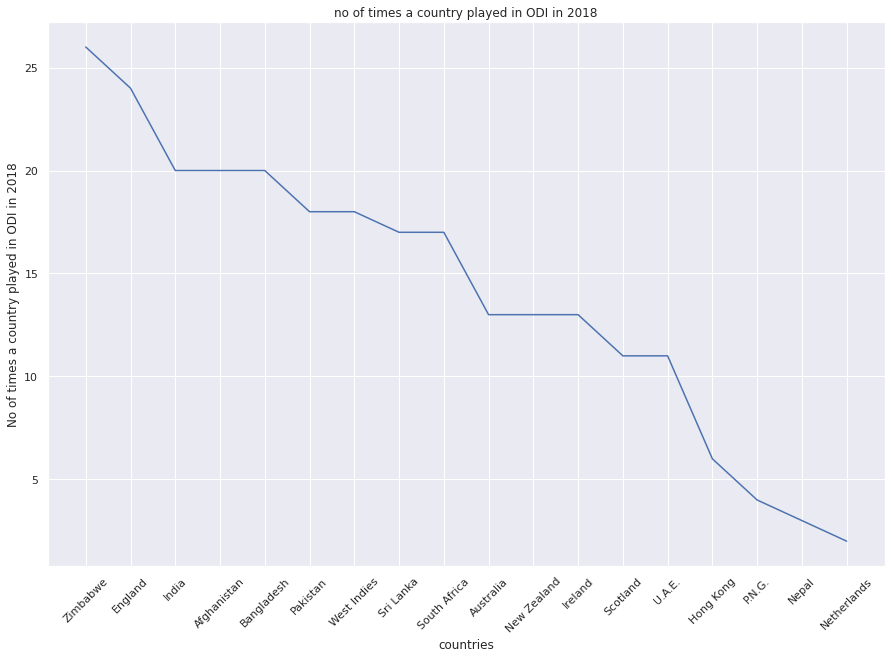

In [84]:
plt.figure(figsize=(15,10))
plt.plot(dict1);
plt.xticks(rotation=45)
plt.ylabel("No of times a country played in ODI in 2018")
plt.xlabel("countries")
plt.title("no of times a country played in ODI in 2018")

#Top 3 countries who won the most ODIs

In [85]:
count=data1['Winner'].value_counts() 
count

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
West Indies      8
New Zealand      8
Ireland          8
Pakistan         8
Sri Lanka        6
Zimbabwe         5
Scotland         5
U.A.E.           4
tied             3
no result        2
Australia        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

In [86]:
for i in range(3):
  print(count.index[i])

England
India
Bangladesh


##How was the performance of Sri Lanka

In [89]:
countries=pd.concat([data1['Team 1'],data1['Team 2']])
dict1=countries.value_counts() 
dict1

Zimbabwe        26
England         24
India           20
Afghanistan     20
Bangladesh      20
Pakistan        18
West Indies     18
Sri Lanka       17
South Africa    17
Australia       13
New Zealand     13
Ireland         13
Scotland        11
U.A.E.          11
Hong Kong        6
P.N.G.           4
Nepal            3
Netherlands      2
dtype: int64

In [90]:
winner=data1['Winner'].value_counts() 
winner

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
West Indies      8
New Zealand      8
Ireland          8
Pakistan         8
Sri Lanka        6
Zimbabwe         5
Scotland         5
U.A.E.           4
tied             3
no result        2
Australia        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

In [91]:
#Sri Lanka played 17 matches out of 128
performance=(winner.loc['Sri Lanka']/dict1.loc['Sri Lanka'])*100
performance

35.294117647058826

In [92]:
per={}
for i in dict1.index:
  for j in winner.index:
    if i==j:
      win=(winner.loc[j]/dict1.loc[i])*100
      per[i]=win
perf=pd.DataFrame(per.items())
perf.columns =['country', 'performance']
perf

,country,performance
0,Zimbabwe,19.230769
1,England,70.833333
2,India,70.000000
3,Afghanistan,60.000000
4,Bangladesh,65.000000
5,Pakistan,44.444444
6,West Indies,44.444444
7,Sri Lanka,35.294118
8,South Africa,52.941176
9,Australia,15.384615


Text(0.5, 1.0, 'countries and their performance')

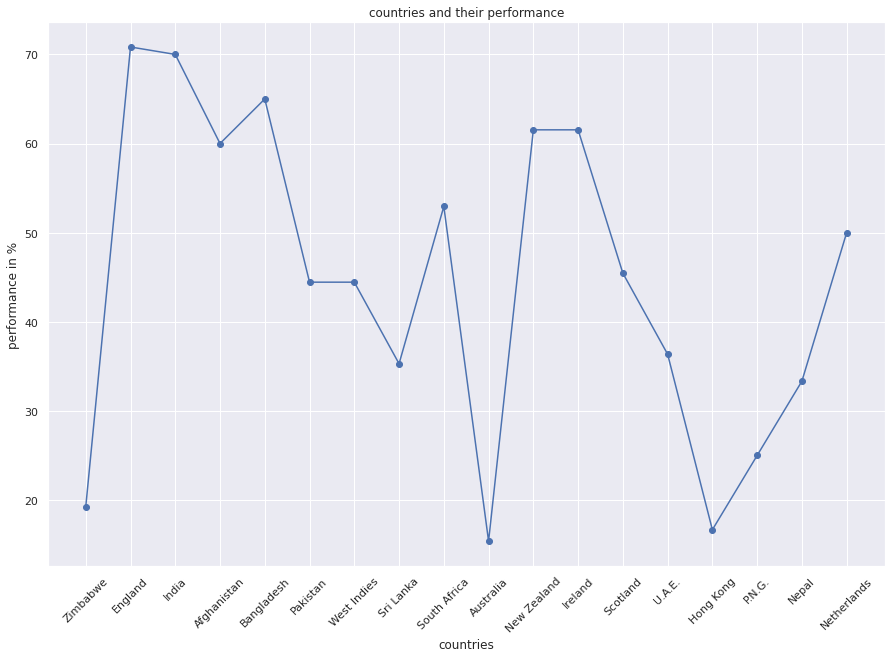

In [93]:
plt.figure(figsize=(15,10))
plt.plot(perf['country'],perf['performance']);
plt.scatter(perf['country'],perf['performance']);
plt.xticks(rotation=45)
plt.ylabel("performance in %")
plt.xlabel("countries")
plt.title("countries and their performance")

##What are the top 3 wins by Runs

In [94]:
data2=data1[data1['winner_by_run']!=0]

In [95]:
winner=data2['Winner'].value_counts() 
w=pd.DataFrame(winner)
w

,Winner
England,8
Bangladesh,8
West Indies,5
Afghanistan,5
Zimbabwe,5
Ireland,4
Sri Lanka,4
India,4
New Zealand,4
U.A.E.,3


##Month in which most ODIs were played

In [96]:

data1['Match Date'] = pd.to_datetime(data1['Match Date'])
data1.head()

,Team 1,Team 2,Winner,Ground,Match Date,Scorecard,winner_by_run,winner_by_wickets
0,New Zealand,Pakistan,New Zealand,Wellington,2018-01-06,ODI # 3946,61,0
1,New Zealand,Pakistan,New Zealand,Nelson,2018-01-09,ODI # 3947,0,8
2,U.A.E.,Ireland,Ireland,ICCA Dubai,2018-01-11,ODI # 3948,0,4
3,New Zealand,Pakistan,New Zealand,Dunedin,2018-01-13,ODI # 3949,183,0
4,U.A.E.,Ireland,Ireland,ICCA Dubai,2018-01-13,ODI # 3950,67,0


In [97]:
import datetime as datetime
data3=data1.groupby([data1['Match Date'].dt.month]).agg({'Team 1':'count'})
data4=pd.DataFrame([data3.index,data3.values]).T
data4.columns =['month', 'count']
data4['count']=data4['count'].astype('int64')



month_name=[]
for i in data4['month']:
  datetime_object = datetime.datetime.strptime(str(i), "%m")
  month_name.append(datetime_object.strftime("%b"))
data4['month_name']=month_name
data4.drop(['month'],axis=1,inplace=True)

In [98]:
data5=data4.set_index(['month_name'])
data5.idxmax(axis = 0)

count    Mar
dtype: object

##how many cricket match played every month

In [99]:
data4

,count,month_name
0,23,Jan
1,13,Feb
2,26,Mar
3,6,Jun
4,12,Jul
5,10,Aug
6,14,Sep
7,14,Oct
8,7,Nov
9,3,Dec


Text(0.5, 1.0, 'cricket match played every month')

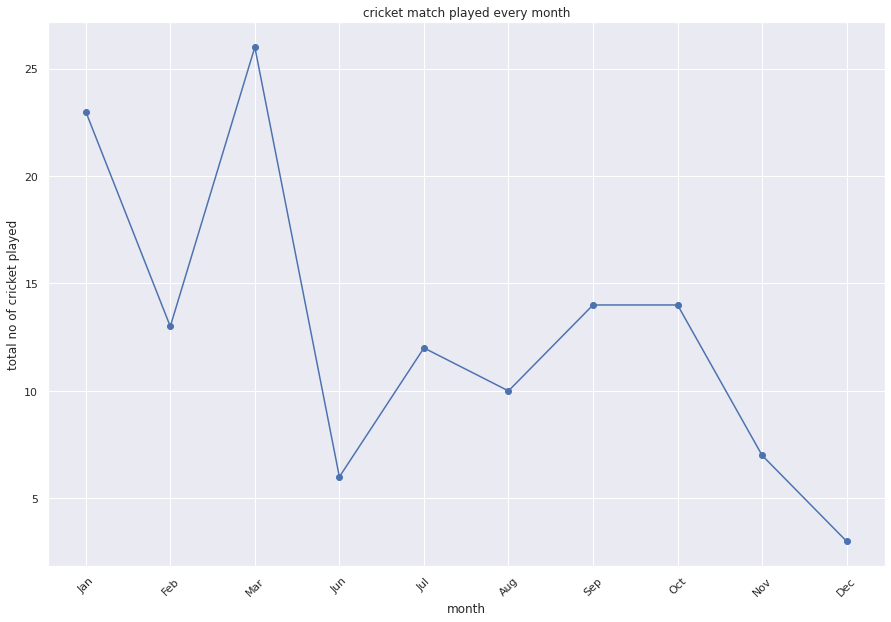

In [100]:
plt.figure(figsize=(15,10))
plt.plot(data4['month_name'],data4['count']);
plt.scatter(data4['month_name'],data4['count']);
plt.xticks(rotation=45)
plt.ylabel("total no of cricket played")
plt.xlabel("month")
plt.title("cricket match played every month")

##On which ground most games were played

In [101]:
ground=data1['Ground'].value_counts()

In [102]:
ground.idxmax()

'Harare'

##top most countries win matches in 2018, what were there winning percentage every month

In [103]:
winner=data1['Winner'].value_counts() 
#top 3 countries who win the most matches in 2018
winner.index[0:3]

Index(['England', 'India', 'Bangladesh'], dtype='object')

In [104]:
df=data1
df["day"] = df['Match Date'].map(lambda x: x.day)
df["month"] = df['Match Date'].map(lambda x: x.month)
df["year"] = df['Match Date'].map(lambda x: x.year)
df.drop(['Match Date'],axis=1,inplace=True)

In [105]:
month_name=[]
for i in df['month']:
  datetime_object = datetime.datetime.strptime(str(i), "%m")
  month_name.append(datetime_object.strftime("%b"))
df['month']=month_name
a=df[df['Winner']=='England']
b=a.groupby([a['month']]).agg({'Winner':'count'})
b.index = pd.CategoricalIndex(b.index,categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'],ordered=True)
b = b.sort_index()
b

,Winner
month,
Feb,1
Jan,4
Jul,2
Jun,5
Mar,2
Oct,3


In [122]:
x=df['Team 2']=='England'
y=df['Team 1']=='England'
ddf=df[x | y]
bb1=ddf.groupby([ddf['month']]).agg({'Team 1':'count'})
bb1.index = pd.CategoricalIndex(bb1.index,categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'],ordered=True)
bb1 = bb1.sort_index()
bb1

,Team 1
month,
Feb,2
Jan,5
Jul,3
Jun,6
Mar,3
Oct,5


In [142]:
per={}
for i in bb1.index:
  for j in b.index:
    if i==j:
      win=(b.loc[j][0]/bb1.loc[i][0])*100
      per[i]=win
perf=pd.DataFrame(per.items())
perf.columns =['month', 'performance']
perf

,month,performance
0,Jan,80.000000
1,Feb,50.000000
2,Mar,66.666667
3,Jun,83.333333
4,Jul,66.666667
5,Oct,60.000000


<Figure size 1080x720 with 0 Axes>

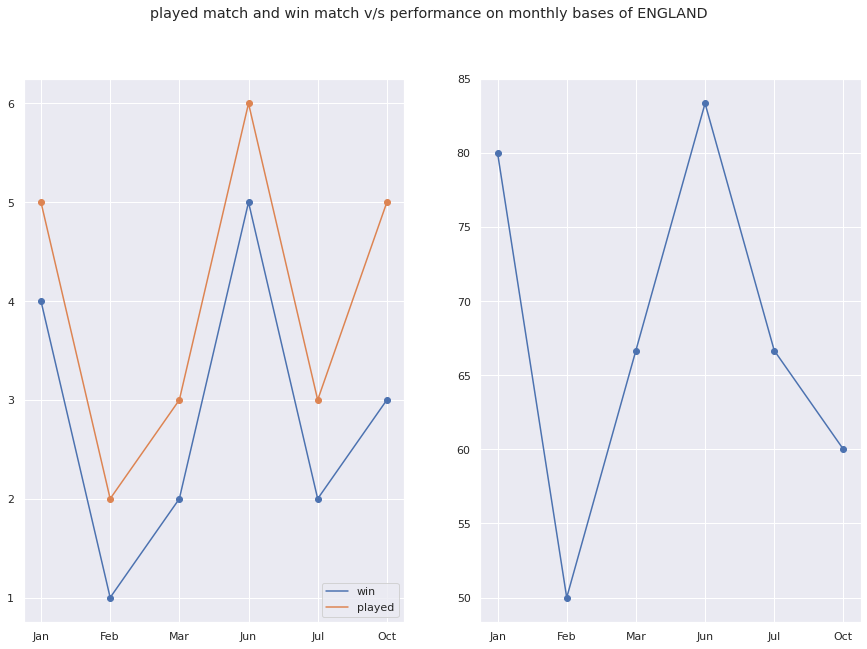

In [150]:
plt.figure(figsize=(15,10))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
ax1.plot(b.index,b.values);
ax1.scatter(b.index,b.values);
ax1.plot(bb1.index,bb1.values);
ax1.scatter(bb1.index,bb1.values);
fig.suptitle('Total match played and win  v/s performance of ENGLAND')
ax1.legend(["win", "played"], loc ="lower right")
ax2.plot(perf['month'],perf['performance']);
ax2.scatter(perf['month'],perf['performance']);